# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from itertools import cycle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import mne
from mne.io import read_raw_edf
from mne.filter import notch_filter, filter_data

from scipy.signal import periodogram

import xgboost as xgb

# Config

In [3]:
class Config:
    def __init__(self, data_path='/Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/'):
        self.data_path = data_path

In [4]:
cfg = Config()

# Metadata

**File Name: chb01_01.edf**
* File Start Time: 11:42:54
* File End Time: 12:42:54
* Number of Seizures in File: 0

**File Name: chb01_02.edf**
* File Start Time: 12:42:57
* File End Time: 13:42:57
* Number of Seizures in File: 0

**File Name: chb01_03.edf**
* File Start Time: 13:43:04
* File End Time: 14:43:04
* Number of Seizures in File: 1
* Seizure Start Time: 2996 seconds
* Seizure End Time: 3036 seconds

**File Name: chb01_04.edf**
* File Start Time: 14:43:12
* File End Time: 15:43:12
* Number of Seizures in File: 1
* Seizure Start Time: 1467 seconds
* Seizure End Time: 1494 seconds

**File Name: chb01_15.edf**
* File Start Time: 01:44:44
* File End Time: 2:44:44
* Number of Seizures in File: 1
* Seizure Start Time: 1732 seconds
* Seizure End Time: 1772 seconds

**File Name: chb01_18.edf**
* File Start Time: 04:45:06
* File End Time: 5:45:06
* Number of Seizures in File: 1
* Seizure Start Time: 1720 seconds
* Seizure End Time: 1810 seconds

**File Name: chb01_21.edf**
* File Start Time: 07:33:46
* File End Time: 8:33:46
* Number of Seizures in File: 1
* Seizure Start Time: 327 seconds
* Seizure End Time: 420 seconds*

# Load data

In [5]:
raw_1 = read_raw_edf(cfg.data_path+'chb01_01.edf', preload=True)
raw_2 = read_raw_edf(cfg.data_path+'chb01_02.edf', preload=True)
raw_3 = read_raw_edf(cfg.data_path+'chb01_03.edf', preload=True)
raw_4 = read_raw_edf(cfg.data_path+'chb01_04.edf', preload=True)

raw_15 = read_raw_edf(cfg.data_path+'chb01_15.edf', preload=True)
raw_18 = read_raw_edf(cfg.data_path+'chb01_18.edf', preload=True)
raw_21 = read_raw_edf(cfg.data_path+'chb01_21.edf', preload=True)

Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_1 = read_raw_edf(cfg.data_path+'chb01_01.edf', preload=True)


Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_2 = read_raw_edf(cfg.data_path+'chb01_02.edf', preload=True)


Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_3 = read_raw_edf(cfg.data_path+'chb01_03.edf', preload=True)


Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_4 = read_raw_edf(cfg.data_path+'chb01_04.edf', preload=True)


Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_15 = read_raw_edf(cfg.data_path+'chb01_15.edf', preload=True)


Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_18 = read_raw_edf(cfg.data_path+'chb01_18.edf', preload=True)


Extracting EDF parameters from /Users/guillaumecorda/Desktop/UvA/Big Data/Project/data/chb01_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-5-c17ff58dbffe>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_21 = read_raw_edf(cfg.data_path+'chb01_21.edf', preload=True)


In [6]:
raw_1.set_eeg_reference('average', projection=True)  # set EEG average reference
raw_2.set_eeg_reference('average', projection=True)  # set EEG average reference
raw_3.set_eeg_reference('average', projection=True)  # set EEG average reference
raw_4.set_eeg_reference('average', projection=True)  # set EEG average reference

raw_15.set_eeg_reference('average', projection=True)  # set EEG average reference
raw_18.set_eeg_reference('average', projection=True)  # set EEG average reference
raw_21.set_eeg_reference('average', projection=True)  # set EEG average reference

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Adding average EEG reference projection.
1 projection items deactivated
Average reference proje

<RawEDF  |  chb01_21.edf, n_channels x n_times : 23 x 921600 (3600.0 sec), ~161.8 MB, data loaded>

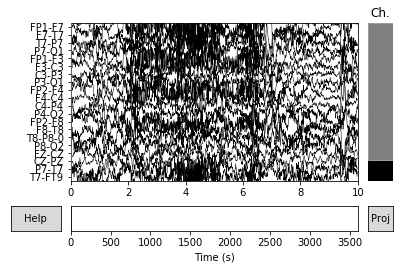

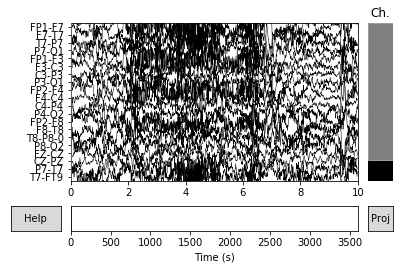

In [7]:
raw_1.plot(block=True, lowpass=40)

Effective window size : 8.000 (s)


<ipython-input-8-ec0243499d15>:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks)


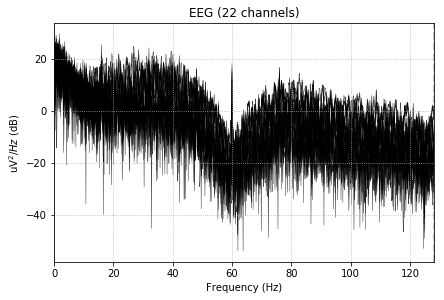

Effective window size : 8.000 (s)


<ipython-input-8-ec0243499d15>:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks)


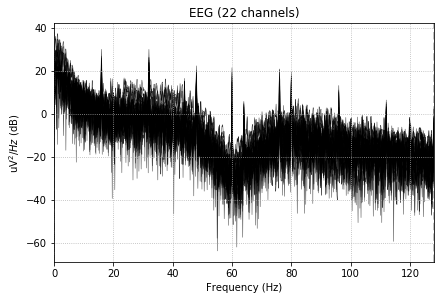

Effective window size : 8.000 (s)


<ipython-input-8-ec0243499d15>:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks)


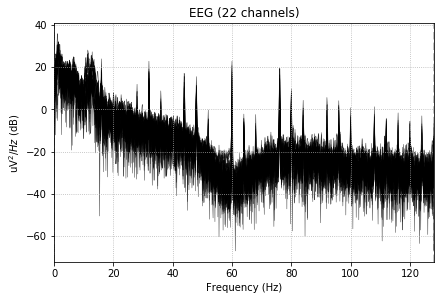

Effective window size : 8.000 (s)


<ipython-input-8-ec0243499d15>:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks)


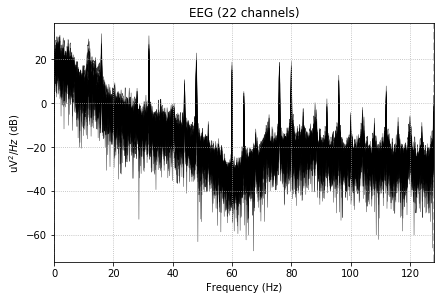

In [8]:
for raw in [raw_1, raw_2, raw_3, raw_4]:
    fmin, fmax = 2, 300  # look at frequencies between 2 and 300Hz
    n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2

    picks = mne.pick_types(raw.info, eeg=True, eog=False, stim=False, exclude='bads')

    # Let's first check out all channel types
    raw.plot_psd(area_mode='range', tmax=10.0, picks=picks)

# Helper functions

In [9]:
def get_sampl_freq(raw):
    return raw.info['sfreq']

In [10]:
def get_channels_names(raw):
    return raw.info['ch_names']

In [11]:
sf_1 = get_sampl_freq(raw_1)
sf_2 = get_sampl_freq(raw_2)
sf_3 = get_sampl_freq(raw_3)
sf_4 = get_sampl_freq(raw_4)

sf_15 = get_sampl_freq(raw_15)
sf_18 = get_sampl_freq(raw_18)
sf_21 = get_sampl_freq(raw_21)

In [12]:
ch_1 = get_channels_names(raw_1)
ch_2 = get_channels_names(raw_2)
ch_3 = get_channels_names(raw_3)
ch_4 = get_channels_names(raw_4)

ch_15 = get_channels_names(raw_15)
ch_18 = get_channels_names(raw_18)
ch_21 = get_channels_names(raw_21)

# Preprocessing

## Removing power line frequency

Setting up band-stop filter from 47 - 49 Hz
Filter length of 1691 samples (6.605 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Effective window size : 8.000 (s)


<ipython-input-13-36feda9a076a>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_1_filt.plot_psd(area_mode='range', tmax=10.0, picks=picks)


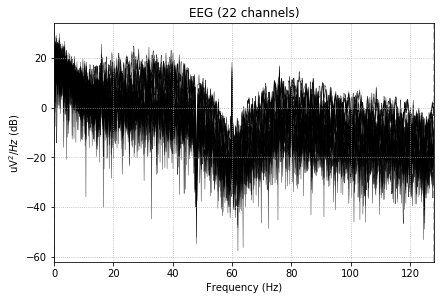

Setting up band-stop filter from 47 - 49 Hz
Filter length of 1691 samples (6.605 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-stop filter from 47 - 49 Hz
Filter length of 1691 samples (6.605 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-stop filter from 47 - 49 Hz
Filter length of 1691 samples (6.605 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-stop filter from 47 - 49 Hz
Filter length of 1691 samples (6.605 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-stop filter from 47 - 49 Hz
Filter length of 1691 samples (6.605 sec) selected
C

In [13]:
#Record 1
filtered_data_1 = notch_filter(raw_1.get_data(), sf_1, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_1_filt = mne.io.RawArray(filtered_data_1, raw_1.info)

#raw_1.plot_psd(area_mode='range', tmax=10.0, picks=picks)
raw_1_filt.plot_psd(area_mode='range', tmax=10.0, picks=picks)

#Record 2
filtered_data_2 = notch_filter(raw_2.get_data(), sf_3, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_2_filt = mne.io.RawArray(filtered_data_2, raw_2.info)

#Record 3
filtered_data_3 = notch_filter(raw_3.get_data(), sf_3, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_3_filt = mne.io.RawArray(filtered_data_3, raw_3.info)

#Record 4
filtered_data_4 = notch_filter(raw_4.get_data(), sf_4, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_4_filt = mne.io.RawArray(filtered_data_4, raw_4.info)

#Record 15
filtered_data_15 = notch_filter(raw_15.get_data(), sf_15, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_15_filt = mne.io.RawArray(filtered_data_15, raw_15.info)

#Record 18
filtered_data_18 = notch_filter(raw_18.get_data(), sf_18, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_18_filt = mne.io.RawArray(filtered_data_18, raw_18.info)

#Record 4
filtered_data_21 = notch_filter(raw_21.get_data(), sf_21, np.arange(48, 52, 4000),
                             picks=picks, filter_length='auto', phase='zero')
raw_21_filt = mne.io.RawArray(filtered_data_21, raw_21.info)

## Keeping only low frequencies

Setting up band-pass filter from 2 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 423 samples (1.652 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Effective window size : 8.000 (s)


<ipython-input-14-06520cd91c58>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_1_filt.plot_psd(area_mode='range', tmax=10.0, picks=picks, fmax=60)


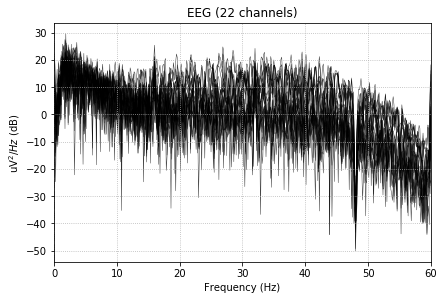

Setting up band-pass filter from 2 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 423 samples (1.652 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-pass filter from 2 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 423 samples (1.652 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-pass filter from 2 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 423 samples (1.652 sec) selected
Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-pass filter from 2 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidt

In [14]:
#Record 1
filtered_data_1 = filter_data(raw_1_filt.get_data(), sf_1, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_1_filt = mne.io.RawArray(filtered_data_1, raw_1.info)
raw_1_filt.plot_psd(area_mode='range', tmax=10.0, picks=picks, fmax=60)

#Record 2
filtered_data_2 = filter_data(raw_2_filt.get_data(), sf_2, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_2_filt = mne.io.RawArray(filtered_data_2, raw_2.info)

#Record 3
filtered_data_3 = filter_data(raw_3_filt.get_data(), sf_3, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_3_filt = mne.io.RawArray(filtered_data_3, raw_3.info)

#Record 4
filtered_data_4 = filter_data(raw_4_filt.get_data(), sf_4, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_4_filt = mne.io.RawArray(filtered_data_4, raw_4.info)

#Record 15
filtered_data_15 = filter_data(raw_15_filt.get_data(), sf_15, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_15_filt = mne.io.RawArray(filtered_data_15, raw_15.info)

#Record 18
filtered_data_18 = filter_data(raw_18_filt.get_data(), sf_18, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_18_filt = mne.io.RawArray(filtered_data_18, raw_18.info)

#Record 21
filtered_data_21 = filter_data(raw_21_filt.get_data(), sf_21, l_freq=2, h_freq=60,
                              picks=picks, filter_length='auto', phase='zero')
raw_21_filt = mne.io.RawArray(filtered_data_21, raw_21.info)

# Extracting features

## Computing PSD

In [15]:
f_1, psd_1 = periodogram(raw_1_filt.get_data(), sf_1)
f_2, psd_2 = periodogram(raw_2_filt.get_data(), sf_2)
f_3, psd_3 = periodogram(raw_3_filt.get_data(), sf_3)
f_4, psd_4 = periodogram(raw_4_filt.get_data(), sf_4)

f_15, psd_15 = periodogram(raw_15_filt.get_data(), sf_15)
f_18, psd_18 = periodogram(raw_18_filt.get_data(), sf_18)
f_21, psd_21 = periodogram(raw_21_filt.get_data(), sf_21)

In [16]:
df_1 = pd.DataFrame(np.transpose(psd_1), columns=ch_1)
df_2 = pd.DataFrame(np.transpose(psd_2), columns=ch_2)
df_3 = pd.DataFrame(np.transpose(psd_3), columns=ch_3)
df_4 = pd.DataFrame(np.transpose(psd_4), columns=ch_4)

df_15 = pd.DataFrame(np.transpose(psd_15), columns=ch_15)
df_18 = pd.DataFrame(np.transpose(psd_18), columns=ch_18)
df_21 = pd.DataFrame(np.transpose(psd_21), columns=ch_21)

In [17]:
df_1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,STI 014
0,1.079577e-40,7.134119e-40,4.484155e-40,6.612156e-41,5.204522e-40,2.938736e-41,3.184141e-40,2.938736e-41,1.275493e-40,1.033149e-40,...,1.028762e-39,2.057243e-40,4.899934e-40,1.474470e-41,3.686175e-42,3.906197e-40,0.000000e+00,3.999946e-41,8.163155e-43,9.044430e-22
1,1.674005e-13,3.571116e-14,2.620634e-15,2.731957e-14,2.490699e-13,4.945877e-14,2.216656e-14,5.769063e-14,1.996568e-13,4.321429e-15,...,5.125356e-14,7.357621e-14,4.011104e-14,5.328930e-14,1.370180e-13,2.620634e-15,4.964142e-14,9.665892e-13,6.120331e-14,1.284794e+09
2,1.674005e-13,3.571119e-14,2.620635e-15,2.731954e-14,2.490699e-13,4.945882e-14,2.216657e-14,5.769061e-14,1.996567e-13,4.321429e-15,...,5.125357e-14,7.357622e-14,4.011105e-14,5.328931e-14,1.370181e-13,2.620635e-15,4.964142e-14,9.665894e-13,6.120333e-14,9.290846e+07
3,1.674007e-13,3.571118e-14,2.620633e-15,2.731957e-14,2.490699e-13,4.945888e-14,2.216658e-14,5.769056e-14,1.996568e-13,4.321421e-15,...,5.125363e-14,7.357633e-14,4.011108e-14,5.328941e-14,1.370180e-13,2.620633e-15,4.964144e-14,9.665896e-13,6.120334e-14,7.945955e+07
4,1.674008e-13,3.571119e-14,2.620694e-15,2.731966e-14,2.490702e-13,4.945897e-14,2.216656e-14,5.769078e-14,1.996572e-13,4.321414e-15,...,5.125357e-14,7.357617e-14,4.011107e-14,5.328949e-14,1.370182e-13,2.620694e-15,4.964148e-14,9.665901e-13,6.120338e-14,6.075410e+08


# Label data

In [18]:
#No seizure
df_1['label'] = 0
df_2['label'] = 0

#Seizures
df_3['label'] = 0
df_3.loc[2996:3037, 'label'] = 1

df_4['label'] = 0
df_4.loc[1467:1494, 'label'] = 1

df_15['label'] = 0
df_15.loc[1732:1772, 'label'] = 1

df_18['label'] = 0
df_18.loc[1720:1810, 'label'] = 1

df_21['label'] = 0
df_21.loc[327:420, 'label'] = 1

In [19]:
df_15['label'].value_counts()

0    460760
1        41
Name: label, dtype: int64

In [ ]:
df_18['label'].value_counts()

0    460710
1        91
Name: label, dtype: int64

# Create final dataset

In [ ]:
#Train only on records with seizure
df = pd.concat([df_3, df_4, df_15, df_18])

# Models

## XGBoost

### Train

In [ ]:
df['label'].value_counts()

0    1843002
1        202
Name: label, dtype: int64

In [ ]:
scale_pos_weight = 1843002/202
scale_pos_weight

9123.772277227723

In [ ]:
clf = xgb.XGBClassifier(eval_metric ='auc', scale_pos_weight=scale_pos_weight)
clf.fit(df.drop('label', axis=1), df['label'])

### Predict

In [ ]:
pred_xgb = clf.predict(df_21.drop('label', axis=1))

In [ ]:
set(pred_xgb)

### ROC curve + Confusion Matrix

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(df_4['label'], pred_xgb)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
     Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [ ]:
class_names={'No Seizure', 'Seizure'}
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(df_4['label'], pred_xgb)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

## Random Forest

## SVM